In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,HTML

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,iso_code3,country,data_source,sector,gas,unit,year,emission
0,963818,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1990,11.63
1,963818,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1991,11.90
2,963818,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1992,11.55
3,963818,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1993,11.68
4,963818,AFG,Afghanistan,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1994,11.73


In [7]:
EGY = df[(df["iso_code3"] == "EGY") & (df["data_source"] == "Climate Watch")]
EGY

,id,iso_code3,country,data_source,sector,gas,unit,year,emission
374717,966782,EGY,Egypt,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1990,138.20
374718,966782,EGY,Egypt,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1991,143.66
374719,966782,EGY,Egypt,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1992,146.17
374720,966782,EGY,Egypt,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1993,151.74
374721,966782,EGY,Egypt,Climate Watch,Total excluding LUCF,All GHG,MtCO₂e,1994,147.99
...,...,...,...,...,...,...,...,...,...
376479,966838,EGY,Egypt,Climate Watch,Total including LUCF,F-Gas,MtCO₂e,2016,3.38
376480,966838,EGY,Egypt,Climate Watch,Total including LUCF,F-Gas,MtCO₂e,2017,3.58
376481,966838,EGY,Egypt,Climate Watch,Total including LUCF,F-Gas,MtCO₂e,2018,3.77
376482,966838,EGY,Egypt,Climate Watch,Total including LUCF,F-Gas,MtCO₂e,2019,3.96


In [9]:
EGY["gas"].unique()

array(['All GHG', 'CO2', 'CH4', 'N2O', 'F-Gas'], dtype=object)

In [27]:
g_avg = EGY.groupby(["year","gas"])["emission"].mean().unstack()
g_sum = EGY.groupby(["year","gas"])["emission"].sum().unstack()

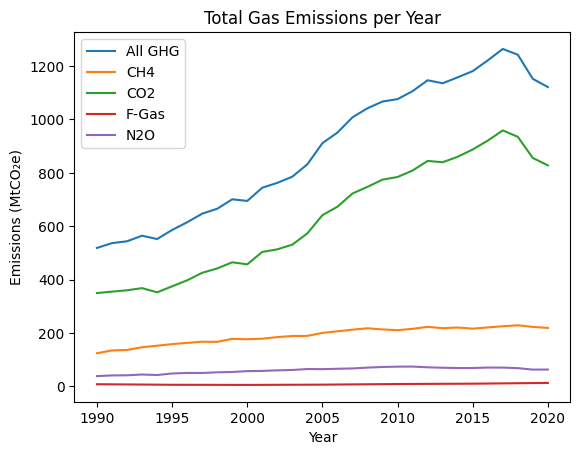

In [28]:
for x in g_sum.columns.values:
    plt.plot(g_sum.index.values,g_sum[x],label=x)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.title('Total Gas Emissions per Year')

plt.legend()
# Display the plot
plt.show()

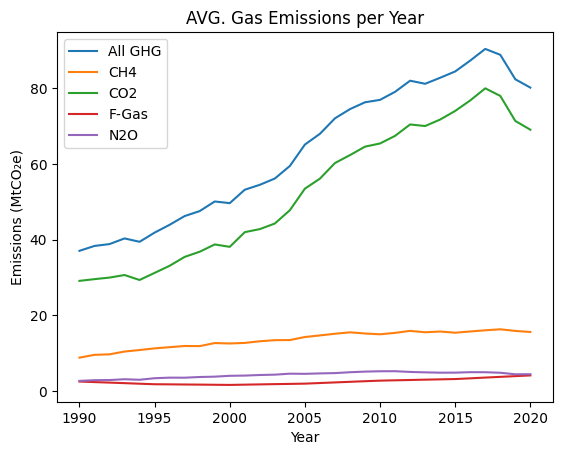

In [29]:
for x in g_avg.columns.values:
    plt.plot(g_avg.index.values,g_avg[x],label=x)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.title('AVG. Gas Emissions per Year')

plt.legend()
# Display the plot
plt.show()

In [47]:
s_avg = EGY.groupby(["sector","gas"])["emission"].mean().unstack(fill_value=0)
s_sum = EGY.groupby(["sector","gas"])["emission"].sum().unstack(fill_value=0)
s_sum

gas,All GHG,CH4,CO2,F-Gas,N2O
sector,,,,,
Agriculture,868.22,451.25,0.00,0.00,416.98
Building,410.84,11.69,397.72,0.00,1.51
Bunker Fuels,189.55,0.28,187.77,0.00,1.49
Electricity/Heat,1873.47,1.09,1870.49,0.00,1.85
Energy,5184.08,660.37,4498.37,0.00,25.34
Fugitive Emissions,755.22,641.02,114.11,0.00,0.21
Industrial Processes,698.80,0.00,455.68,77.13,166.05
Land-Use Change and Forestry,-0.71,0.00,-0.71,0.00,0.00
Manufacturing/Construction,920.21,0.73,917.82,0.00,1.62


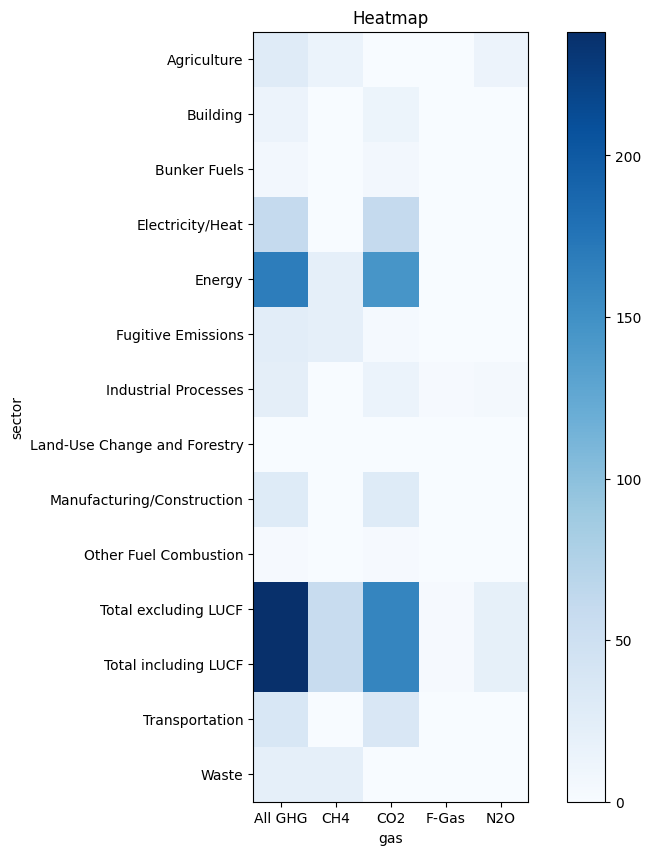

In [56]:
plt.figure(figsize=(10,10))
# Create heatmap
plt.imshow(s_avg, cmap='Blues')

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('gas')
plt.ylabel('sector')
plt.title('Heatmap')

# Set custom label names on x-axis and y-axis
plt.yticks(np.arange(len(s_avg.index.values)), s_avg.index.values)
plt.xticks(np.arange(len(s_avg.columns.values)), s_avg.columns.values)

# Display the plot
plt.show()

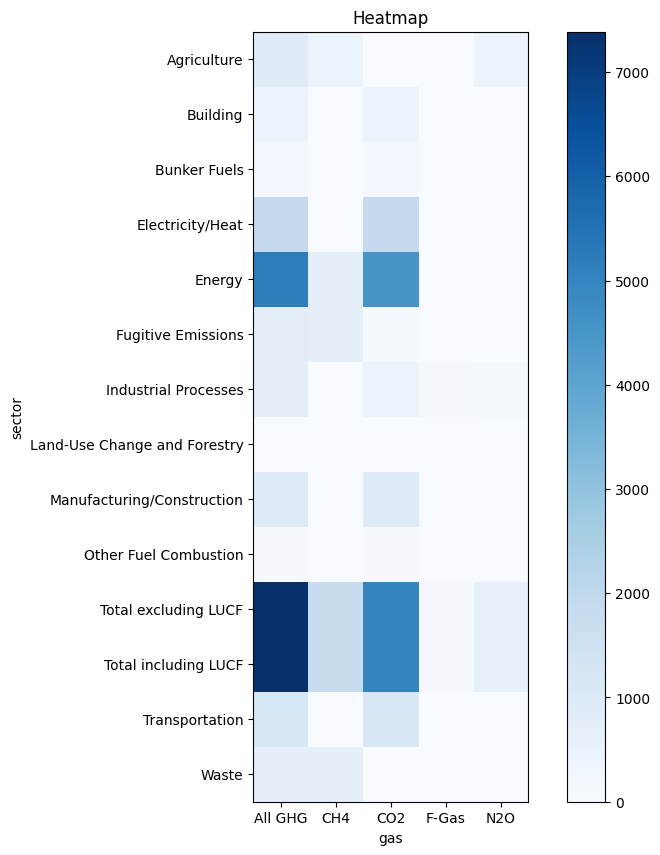

In [55]:
plt.figure(figsize=(10,10))
# Create heatmap
plt.imshow(s_sum, cmap='Blues')

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('gas')
plt.ylabel('sector')
plt.title('Heatmap')

# Set custom label names on x-axis and y-axis
plt.yticks(np.arange(len(s_sum.index.values)), s_sum.index.values)
plt.xticks(np.arange(len(s_sum.columns.values)), s_sum.columns.values)

# Display the plot
plt.show()

In [60]:
sy_avg = EGY.groupby(["year","sector"])["emission"].mean().unstack(fill_value=0)
sy_sum = EGY.groupby(["year","sector"])["emission"].sum().unstack(fill_value=0)
display(sy_avg)
display(sy_sum)

sector,Agriculture,Building,Bunker Fuels,Electricity/Heat,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Manufacturing/Construction,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Transportation,Waste
year,,,,,,,,,,,,,,
1990,13.813333,5.0625,2.9500,12.7100,49.4175,10.0400,4.748,-0.205,13.3325,0.0000,55.282,55.118,8.2700,4.513333
1991,14.736667,4.8250,2.9850,13.4850,50.1900,11.1125,5.202,-0.205,12.1250,0.0000,57.464,57.300,8.6475,5.450000
1992,15.060000,4.7375,2.5150,13.8450,50.3550,9.8500,5.316,-0.205,12.9400,0.0000,58.468,58.304,8.9825,6.386667
1993,15.763333,4.2400,2.7975,13.7600,52.1450,10.7450,5.134,-0.205,14.0625,0.0000,60.698,60.534,9.3425,7.320000
1994,15.353333,4.7000,4.4900,13.4400,49.8450,11.0675,5.156,-0.205,10.2850,0.1250,59.196,59.034,10.2300,8.256667
1995,16.580000,4.9550,4.4150,13.7100,52.6050,11.3850,5.458,-0.205,11.5250,0.1850,63.002,62.838,10.8450,9.193333
1996,17.010000,5.0350,5.4900,14.0500,54.9250,11.4400,5.734,-0.205,12.6950,0.2225,65.956,65.792,11.4850,10.126667
1997,17.243333,5.5300,5.5425,15.3250,58.0350,11.1075,6.002,-0.205,13.3975,0.3925,69.414,69.250,12.2800,11.060000
1998,16.996667,5.8975,4.1550,17.3775,59.9900,10.5500,6.326,-0.205,12.4050,0.1250,71.710,71.548,13.6350,11.996667


sector,Agriculture,Building,Bunker Fuels,Electricity/Heat,Energy,Fugitive Emissions,Industrial Processes,Land-Use Change and Forestry,Manufacturing/Construction,Other Fuel Combustion,Total excluding LUCF,Total including LUCF,Transportation,Waste
year,,,,,,,,,,,,,,
1990,41.44,20.25,11.80,50.84,197.67,40.16,23.74,-0.82,53.33,0.00,276.41,275.59,33.08,13.54
1991,44.21,19.30,11.94,53.94,200.76,44.45,26.01,-0.82,48.50,0.00,287.32,286.50,34.59,16.35
1992,45.18,18.95,10.06,55.38,201.42,39.40,26.58,-0.82,51.76,0.00,292.34,291.52,35.93,19.16
1993,47.29,16.96,11.19,55.04,208.58,42.98,25.67,-0.82,56.25,0.00,303.49,302.67,37.37,21.96
1994,46.06,18.80,17.96,53.76,199.38,44.27,25.78,-0.82,41.14,0.50,295.98,295.17,40.92,24.77
1995,49.74,19.82,17.66,54.84,210.42,45.54,27.29,-0.82,46.10,0.74,315.01,314.19,43.38,27.58
1996,51.03,20.14,21.96,56.20,219.70,45.76,28.67,-0.82,50.78,0.89,329.78,328.96,45.94,30.38
1997,51.73,22.12,22.17,61.30,232.14,44.43,30.01,-0.82,53.59,1.57,347.07,346.25,49.12,33.18
1998,50.99,23.59,16.62,69.51,239.96,42.20,31.63,-0.82,49.62,0.50,358.55,357.74,54.54,35.99


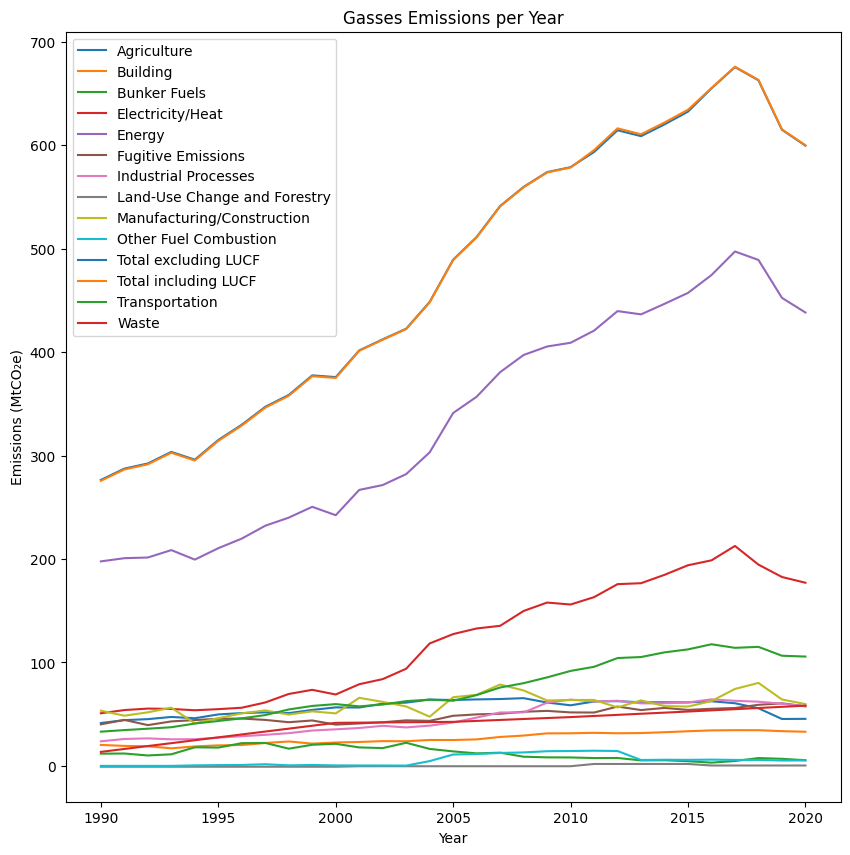

In [62]:
plt.figure(figsize=(10,10))

for x in sy_sum.columns.values:
    plt.plot(sy_sum.index.values,sy_sum[x],label=x)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.title('Gasses Emissions per Year')

plt.legend()
# Display the plot
plt.show()